In [240]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

# plot_confusion_matrix is a handy visual tool, added in the latest version of scikit-learn
# if you are running an older version, comment out this line and just use confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from sklearn.dummy import DummyClassifier
from sklearn import svm
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

ModuleNotFoundError: No module named 'imblearn'

In [106]:
df_target = pd.read_csv('tanzania_target.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'tanzania_target.csv'

In [107]:
df_train = pd.read_csv('tanzania_training.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'tanzania_training.csv'

In [5]:
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [194]:

df_target.sort_index( ascending=[True])

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [195]:
target_list= df_target.status_group.tolist()

In [196]:
df_train['target'] = target_list

In [197]:
df_target.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [198]:
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [199]:
df_train.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.002082
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910
construction_year,-0.002082,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000


In [200]:
df_train.dtypes
#31 objs, 8 ints

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [201]:
df_train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [202]:
df_train.isna().sum()
#scheme_management         3877
#scheme_name              28166
#permit                    3056
#public_meeting            3334
#subvillage                 371
#installer                 3655
#funder                    3635
#consider dropping scheme_name
#some kind of connection between funder and installer

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [203]:
df_target.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [204]:
numeric_columns = ["amount_tsh", "gps_height", "longitude", "latitude", "num_private", "region_code", "district_code", "population", "construction_year"]

In [205]:
#sns.pairplot(df_train[numeric_columns]);

In [206]:
#this is a huge amount of data. To make processing go faster  
#I am going ot drop some columns
#columns to possibly drop: 
#wpt_name:name of the water point
#num_private: isn't given a description
#recorded_by: group that recorded data
#scheme_name: missing more than half its rows


In [207]:
dummy_model = DummyClassifier(strategy="most_frequent")
#dummy model that will pick the largest class

In [208]:
numeric_df = df_train[numeric_columns]
X = numeric_df.drop("num_private", axis=1)
y = df_target["status_group"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)
#just using numeric columns as features

In [209]:
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [210]:
dummy_model.predict(X_train)

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'functional'], dtype='<U10')

In [211]:
cross_val_score(dummy_model, X_train, y_train, cv=3)
#score of about 54%
#terrible

array([0.54255892, 0.54249158, 0.54249158])

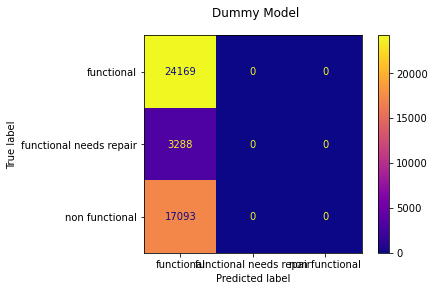

In [212]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="plasma");

In [213]:
#next steps:

#use missing indicator:
#impute:
#scheme_management         3877
#scheme_name              28166
#permit                    3056
#public_meeting            3334
#subvillage                 371
#installer                 3655
#funder                    3635

#drop:
#wpt_name:name of the water point
#num_private: isn't given a description
#recorded_by: group that recorded data
#scheme_name: missing more than half its rows
# date recorded

#one hot encode all categorical values

#scale features

# work with either quantity or quantity group
#work with  quality group
#keep waterpoint_type
#keep source class and source 
#keep payment type
#keep management and management group
#extraction class and extraction type
#get rid of scheme name
#get rid of num_private
#drop subvillage
#drop date_recorded
#drop rows for na for funder and installer
#drop wpt_name
#df_clean = df_train.drop(['quantity'], , axis = 1)

In [214]:
df_train.ward.value_counts()

Igosi               307
Imalinyi            252
Siha Kati           232
Mdandu              231
Nduruma             217
                   ... 
Mawenzi               1
Mwanga Kaskazini      1
Nsemulwa              1
Kinungu               1
Uwanja wa Ndege       1
Name: ward, Length: 2092, dtype: int64

In [215]:
df_train.lga.value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [216]:
df_train.district_code.value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [217]:
to_drop = ['date_recorded',  
'installer',
'wpt_name',  
'subvillage',  
'recorded_by',  
'scheme_name',  
'extraction_type_group',  
'payment',  
'water_quality',  
'quantity',  
'source_type',  
'waterpoint_type_group',
'num_private',
'region',
'ward',
'id',
'public_meeting'           
]
df_clean = df_train.drop(to_drop, axis = 1)
#drop id
#drop public meeting 

In [218]:
pd.set_option('display.max_columns', None)
df_clean.head(5)

,amount_tsh,funder,gps_height,longitude,latitude,basin,region_code,district_code,lga,population,scheme_management,permit,construction_year,extraction_type,extraction_type_class,management,management_group,payment_type,quality_group,quantity_group,source,source_class,waterpoint_type,target
0,6000.0,Roman,1390,34.938093,-9.856322,Lake Nyasa,11,5,Ludewa,109,VWC,False,1999,gravity,gravity,vwc,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional
1,0.0,Grumeti,1399,34.698766,-2.147466,Lake Victoria,20,2,Serengeti,280,Other,True,2010,gravity,gravity,wug,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,25.0,Lottery Club,686,37.460664,-3.821329,Pangani,21,4,Simanjiro,250,VWC,True,2009,gravity,gravity,vwc,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,functional
3,0.0,Unicef,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,Nanyumbu,58,VWC,True,1986,submersible,submersible,vwc,user-group,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional
4,0.0,Action In A,0,31.130847,-1.825359,Lake Victoria,18,1,Karagwe,0,NaN,True,0,gravity,gravity,other,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional


In [219]:
df_clean.shape

#amount_tsh, gps_height, longitude, latitude, population

(59400, 24)

In [220]:
col_names = df_clean.columns
cat = [ 'funder', 'basin',
       'region_code', 'district_code', 'lga',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_class', 'management', 'management_group',
       'payment_type', 'quality_group', 'quantity_group', 'source',
       'source_class', 'waterpoint_type']

In [221]:
df_clean.dropna(inplace=True)

In [222]:
df_clean.shape

(51329, 24)

In [223]:
df_clean.isna().sum()

amount_tsh               0
funder                   0
gps_height               0
longitude                0
latitude                 0
basin                    0
region_code              0
district_code            0
lga                      0
population               0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_class    0
management               0
management_group         0
payment_type             0
quality_group            0
quantity_group           0
source                   0
source_class             0
waterpoint_type          0
target                   0
dtype: int64

In [224]:
df_clean.target.value_counts()
#functional                 32259
#non functional             22824
#functional needs repair     4317-


functional                 28076
non functional             19626
functional needs repair     3627
Name: target, dtype: int64

In [225]:
#impute constuction year after train test split
#one hot encode before tts

In [226]:
#def encoding(df, categors):
#    ohe = OneHotEncoder()
#    df_cat = df[categors]
#    feat_array = ohe.fit_transform(df_cat).toarray()



# group workflow

## create workable df

In [233]:
df_combo = df_clean[['funder', 'region_code', 'scheme_management', 'quality_group', 
                    'quantity_group', 'source', 'extraction_type_class', 'waterpoint_type']]
#keep for cat: funder, region_code, scheme_management, extraction_type_class, quality_group, quantity_group, source
#double chosen set

In [235]:
df_num = df_clean[['amount_tsh', 'construction_year', 'latitude', 'longitude']]
#nums to keep long, lat, amount_tsh, constuction_year
#update

In [236]:
df_completed = df_num.join(df_combo, how='outer')
df_completed.shape
#update

(51329, 12)

## Train test split

In [237]:
X_train, X_test, y_train, y_test = train_test_split(df_completed, df_clean['target'], 
                                                    random_state = 42, test_size = .3, stratify = df_clean['target'] )

In [242]:
imputer = SimpleImputer(missing_values = 0, strategy = 'most_frequent')
cy_imputed = pd.DataFrame(imputer.fit_transform(X_train['construction_year'])
X_train_imputed.columns = X_train.columns
X_train_imputed.head()

,amount_tsh,construction_year,latitude,longitude,funder,region_code,scheme_management,quality_group,quantity_group,source,extraction_type_class,waterpoint_type
0,500,2008,-4.351,35.8278,Water,1,VWC,good,enough,shallow well,handpump,hand pump
1,500,1974,-3.29203,37.4336,Government Of Tanzania,3,VWC,good,enough,spring,gravity,communal standpipe
2,500,2008,-2.42715,32.0918,Swedish,19,VWC,good,dry,shallow well,handpump,hand pump
3,500,1983,-10.7145,36.0091,Danida,10,VWC,good,seasonal,river,gravity,communal standpipe
4,500,2008,-5.20501,38.6172,Government Of Tanzania,4,VWC,good,enough,spring,gravity,communal standpipe multiple


## OHE

In [ ]:
ohe = OneHotEncoder()
ohe_combo =pd.DataFrame(ohe.fit_transform(X_train, y_train).toarray(), index = df_completed.index, columns = ohe.get_feature_names())
#update
#ohe cat data

## Impute

In [ ]:
imputer = SimpleImputer(missing_values = 0, strategy = 'most_frequent')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train))
X_train_imputed.columns = X_train.columns
#impute consturction score

## Scale

In [ ]:
scaler = StandardScaler()

scaler.fit(df_picked)
X_scale = scaler.transform(df_picked)
scaled_pick = pd.DataFrame(X_scale, columns=df_picked.columns, index=df_picked.index)

#update combine and scale

## pipeline/smote

In [ ]:
test_pipe = make_pipeline(SMOTE(), LogisticRegression())

In [ ]:
X_train_resampled, y_train_resampled = test_pipe.fit_resample(X_train, y_train)

## cross validate

In [ ]:
from sklearn.model_selection import cross_validate
cross_validate(test_pipe, X_train, y_train)

## grid search

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_tr_val)
p_score_lr = precision_score(y_t_val, y_pred_lr)
p_score_lr

In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = lr.predict(X_tr_val)
p_score_bnb = precision_score(y_t_val, y_pred_bnb)
p_score_bnb

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd = lr.predict(X_tr_val)
p_score_sgd = precision_score(y_t_val, y_pred_sgd)
p_score_sgd

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = lr.predict(X_tr_val)
p_score_knn = precision_score(y_t_val, y_pred_knn)
p_score_knn

In [ ]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = lr.predict(X_tr_val)
p_score_xgb = precision_score(y_t_val, y_pred_xgb)
p_score_xgb

# pipline implementation

In [ ]:
numeric_features = ['amount_tsh', 'construction_year', 'latitude', 'longitude']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_features = ['funder', 'region_code', 'scheme_management', 'quality_group', 
                    'quantity_group', 'source', 'extraction_type_class', 'waterpoint_type']
categorical_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])



# Hand Picked Features

In [227]:
df_pick = df_clean[['funder', 'region_code', 'scheme_management', 'quality_group', 
                    'quantity_group', 'source', 'management', 'waterpoint_type']]
#keep for cat: funder, region_code, scheme_management, extraction_type_class, quality_group, quantity_group, source

In [162]:
ohe = OneHotEncoder()
ohe_pick =pd.DataFrame(ohe.fit_transform(df_pick).toarray(), index = df_clean.index, columns = ohe.get_feature_names() )

In [163]:
X_train, X_test, y_train, y_test = train_test_split(ohe_pick, df_clean['target'], 
                                                    random_state = 42, test_size = .3, stratify = df_clean['target'] )

In [ ]:
X_tr_val, X_t_val, y_tr_val, y_t_val = train_test_split(X_train, df_clean['target'], 
                                                    random_state = 42, test_size = .3, stratify = df_clean['target'] )

In [174]:
logreg_model = LogisticRegression(random_state=2021,max_iter=1000)
logreg_model.fit(X_train, y_train)
all_features_cross_val_score = cross_val_score(logreg_model, X_train, y_train, cv=3)
all_features_cross_val_score

array([0.73441397, 0.73301122, 0.73371259])

In [175]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
all_features_cross_val_score_2 = cross_val_score(bnb, scaled_df, y_train, cv=3)
all_features_cross_val_score_2

array([0.64744389, 0.65313279, 0.65414589])

In [176]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
all_features_cross_val_score_3 = cross_val_score(sgd, scaled_df, y_train, cv=3)
all_features_cross_val_score_3

array([0.73698566, 0.73597257, 0.73098504])

In [177]:
nums_df = df_clean[['amount_tsh', 'construction_year']]
#nums to keep long, lat, amount_tsh, constuction_year

In [178]:
df_picked = nums_df.join(ohe_pick, how='outer')
df_cat.head()

amount_tsh  construction_year  x0_0  x0_A/co Germany  x0_Aar  x0_Abas Ka  \
0      6000.0               1999   0.0              0.0     0.0         0.0   
1         0.0               2010   0.0              0.0     0.0         0.0   
2        25.0               2009   0.0              0.0     0.0         0.0   
3         0.0               1986   0.0              0.0     0.0         0.0   
5        20.0               2009   0.0              0.0     0.0         0.0   

   x0_Abasia  x0_Abc-ihushi Development Cent  x0_Abd  x0_Abdala  x0_Abddwe  \
0        0.0                             0.0     0.0        0.0        0.0   
1        0.0                             0.0     0.0        0.0        0.0   
2        0.0                             0.0     0.0        0.0        0.0   
3        0.0                             0.0     0.0        0.0        0.0   
5        0.0                             0.0     0.0        0.0        0.0   

   x0_Abdul  x0_Abood  x0_Abs  x0_Aco/germany  x0_Acord  x0_Acra  \
0       0.0       0.0     0.0             0.0       0.0      0.0   
1       0.0       0.0     0.0             0.0       0.0      0.0   
2       0.0       0.0     0.0             0.0       0.0      0.0   
3       0.0       0.0     0.0             0.0       0.0      0.0   
5       0.0       0.0     0.0             0.0       0.0      0.0   

   x0_Action Aid  x0_Action Contre La Faim  x0_Adap  x0_Adb  x0_Adf  x0_Adp  \
0            0.0                       0.0      0.0     0.0     0.0     0.0   
1            0.0                       0.0      0.0     0.0     0.0     0.0   
2            0.0                       0.0      0.0     0.0     0.0     0.0   
3            0.0                       0.0      0.0     0.0     0.0     0.0   
5            0.0                       0.0      0.0     0.0     0.0     0.0   

   x0_Adp Bungu  x0_Adp Mombo  x0_Adp/w  x0_Adra  x0_Af  x0_Afdp  x0_Africa  \
0           0.0           0.0       0.0      0.0    0.0      0.0        0.0   
1           0.0           0.0       0.0      0.0    0.0      0.0        0.0   
2           0.0           0.0       0.0      0.0    0.0      0.0        0.0   
3           0.0           0.0       0.0      0.0    0.0      0.0        0.0   
5           0.0           0.0       0.0      0.0    0.0      0.0        0.0   

   x0_Africa 2000 Network/undp  x0_Africa Amini Alama  \
0                          0.0                    0.0   
1                          0.0                    0.0   
2                          0.0                    0.0   
3                          0.0                    0.0   
5                          0.0                    0.0   

   x0_Africa Project Ev Germany  x0_African  x0_African 2000 Network  \
0                           0.0         0.0                      0.0   
1                           0.0         0.0                      0.0   
2                           0.0         0.0                      0.0   
3                           0.0         0.0                      0.0   
5                           0.0         0.0                      0.0   

   x0_African Barrick Gold  x0_African Development Bank  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
5                      0.0                          0.0   

   x0_African Development Foundation  x0_African Muslim Agency  \
0                                0.0                       0.0   
1                                0.0                       0.0   
2                                0.0                       0.0   
3                                0.0                       0.0   
5                                0.0                       0.0   

   x0_African Realief Committe Of Ku  x0_African Reflections Foundation  \
0                                0.0                                0.0   
1                     

In [184]:
scaler = StandardScaler()

scaler.fit(df_picked)
X_scale = scaler.transform(df_picked)
scaled_pick = pd.DataFrame(X_scale, columns=df_picked.columns, index=df_picked.index)

In [185]:
X_train, X_test, y_train, y_test = train_test_split(scaled_pick, df_clean['target'], random_state = 42)

In [186]:
logreg_model = LogisticRegression(random_state=2021,max_iter=1000)
logreg_model.fit(X_train, y_train)
all_features_cross_val_score = cross_val_score(logreg_model, X_train, y_train, cv=3)
all_features_cross_val_score

array([0.73651808, 0.73558292, 0.73729738])

In [190]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
all_features_cross_val_score_2 = cross_val_score(bnb, X_train, y_train, cv=3)
all_features_cross_val_score_2

array([0.66731608, 0.67136845, 0.68025249])

In [191]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
all_features_cross_val_score_3 = cross_val_score(sgd, X_train, y_train, cv=3)
all_features_cross_val_score_3

array([0.7161783 , 0.70604738, 0.7138404 ])

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
all_features_cross_val_score_5 = cross_val_score(knn,X_train, y_train, cv=3)
all_features_cross_val_score_5

# One Hot Encoding

In [140]:
ohe = OneHotEncoder()
df_cat = df_clean[cat]
ohe_cat =pd.DataFrame(ohe.fit_transform(df_cat).toarray(), index = df_clean.index, columns = ohe.get_feature_names() )

In [141]:
ohe_cat.head()

x0_0  x0_A/co Germany  x0_Aar  x0_Abas Ka  x0_Abasia  \
0   0.0              0.0     0.0         0.0        0.0   
1   0.0              0.0     0.0         0.0        0.0   
2   0.0              0.0     0.0         0.0        0.0   
3   0.0              0.0     0.0         0.0        0.0   
5   0.0              0.0     0.0         0.0        0.0   

   x0_Abc-ihushi Development Cent  x0_Abd  x0_Abdala  x0_Abddwe  x0_Abdul  \
0                             0.0     0.0        0.0        0.0       0.0   
1                             0.0     0.0        0.0        0.0       0.0   
2                             0.0     0.0        0.0        0.0       0.0   
3                             0.0     0.0        0.0        0.0       0.0   
5                             0.0     0.0        0.0        0.0       0.0   

   x0_Abood  x0_Abs  x0_Aco/germany  x0_Acord  x0_Acra  x0_Action Aid  \
0       0.0     0.0             0.0       0.0      0.0            0.0   
1       0.0     0.0             0.0       0.0      0.0            0.0   
2       0.0     0.0             0.0       0.0      0.0            0.0   
3       0.0     0.0             0.0       0.0      0.0            0.0   
5       0.0     0.0             0.0       0.0      0.0            0.0   

   x0_Action Contre La Faim  x0_Adap  x0_Adb  x0_Adf  x0_Adp  x0_Adp Bungu  \
0                       0.0      0.0     0.0     0.0     0.0           0.0   
1                       0.0      0.0     0.0     0.0     0.0           0.0   
2                       0.0      0.0     0.0     0.0     0.0           0.0   
3                       0.0      0.0     0.0     0.0     0.0           0.0   
5                       0.0      0.0     0.0     0.0     0.0           0.0   

   x0_Adp Mombo  x0_Adp/w  x0_Adra  x0_Af  x0_Afdp  x0_Africa  \
0           0.0       0.0      0.0    0.0      0.0        0.0   
1           0.0       0.0      0.0    0.0      0.0        0.0   
2           0.0       0.0      0.0    0.0      0.0        0.0   
3           0.0       0.0      0.0    0.0      0.0        0.0   
5           0.0       0.0      0.0    0.0      0.0        0.0   

   x0_Africa 2000 Network/undp  x0_Africa Amini Alama  \
0                          0.0                    0.0   
1                          0.0                    0.0   
2                          0.0                    0.0   
3                          0.0                    0.0   
5                          0.0                    0.0   

   x0_Africa Project Ev Germany  x0_African  x0_African 2000 Network  \
0                           0.0         0.0                      0.0   
1                           0.0         0.0                      0.0   
2                           0.0         0.0                      0.0   
3                           0.0         0.0                      0.0   
5                           0.0         0.0                      0.0   

   x0_African Barrick Gold  x0_African Development Bank  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
5                      0.0                          0.0   

   x0_African Development Foundation  x0_African Muslim Agency  \
0                                0.0                       0.0   
1                                0.0                       0.0   
2                                0.0                       0.0   
3                                0.0                       0.0   
5                                0.0                       0.0   

   x0_African Realief Committe Of Ku  x0_African Reflections Foundation  \
0                                0.0                                0.0   
1                                0.0                                0.0   
2                                0.0                                0.0   
3                                0.0                      

In [142]:
ohe_cat.shape

(51329, 2010)

In [143]:
num_df = df_clean[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'construction_year']]

In [144]:
num_df.head(10)

,amount_tsh,gps_height,longitude,latitude,population,construction_year
0,6000.0,1390,34.938093,-9.856322,109,1999
1,0.0,1399,34.698766,-2.147466,280,2010
2,25.0,686,37.460664,-3.821329,250,2009
3,0.0,263,38.486161,-11.155298,58,1986
5,20.0,0,39.172796,-4.765587,1,2009
6,0.0,0,33.362410,-3.766365,0,0
8,0.0,0,32.711100,-5.146712,0,0
10,0.0,62,39.209518,-7.034139,345,2011
11,200.0,1062,35.770258,-10.574175,250,1987
12,0.0,0,33.798106,-3.290194,0,0


In [145]:
num_df.shape

(51329, 6)

In [146]:
df_cat = num_df.join(ohe_cat, how='outer')

In [147]:
df_cat.head()

amount_tsh  gps_height  longitude   latitude  population  \
0      6000.0        1390  34.938093  -9.856322         109   
1         0.0        1399  34.698766  -2.147466         280   
2        25.0         686  37.460664  -3.821329         250   
3         0.0         263  38.486161 -11.155298          58   
5        20.0           0  39.172796  -4.765587           1   

   construction_year  x0_0  x0_A/co Germany  x0_Aar  x0_Abas Ka  x0_Abasia  \
0               1999   0.0              0.0     0.0         0.0        0.0   
1               2010   0.0              0.0     0.0         0.0        0.0   
2               2009   0.0              0.0     0.0         0.0        0.0   
3               1986   0.0              0.0     0.0         0.0        0.0   
5               2009   0.0              0.0     0.0         0.0        0.0   

   x0_Abc-ihushi Development Cent  x0_Abd  x0_Abdala  x0_Abddwe  x0_Abdul  \
0                             0.0     0.0        0.0        0.0       0.0   
1                             0.0     0.0        0.0        0.0       0.0   
2                             0.0     0.0        0.0        0.0       0.0   
3                             0.0     0.0        0.0        0.0       0.0   
5                             0.0     0.0        0.0        0.0       0.0   

   x0_Abood  x0_Abs  x0_Aco/germany  x0_Acord  x0_Acra  x0_Action Aid  \
0       0.0     0.0             0.0       0.0      0.0            0.0   
1       0.0     0.0             0.0       0.0      0.0            0.0   
2       0.0     0.0             0.0       0.0      0.0            0.0   
3       0.0     0.0             0.0       0.0      0.0            0.0   
5       0.0     0.0             0.0       0.0      0.0            0.0   

   x0_Action Contre La Faim  x0_Adap  x0_Adb  x0_Adf  x0_Adp  x0_Adp Bungu  \
0                       0.0      0.0     0.0     0.0     0.0           0.0   
1                       0.0      0.0     0.0     0.0     0.0           0.0   
2                       0.0      0.0     0.0     0.0     0.0           0.0   
3                       0.0      0.0     0.0     0.0     0.0           0.0   
5                       0.0      0.0     0.0     0.0     0.0           0.0   

   x0_Adp Mombo  x0_Adp/w  x0_Adra  x0_Af  x0_Afdp  x0_Africa  \
0           0.0       0.0      0.0    0.0      0.0        0.0   
1           0.0       0.0      0.0    0.0      0.0        0.0   
2           0.0       0.0      0.0    0.0      0.0        0.0   
3           0.0       0.0      0.0    0.0      0.0        0.0   
5           0.0       0.0      0.0    0.0      0.0        0.0   

   x0_Africa 2000 Network/undp  x0_Africa Amini Alama  \
0                          0.0                    0.0   
1                          0.0                    0.0   
2                          0.0                    0.0   
3                          0.0                    0.0   
5                          0.0                    0.0   

   x0_Africa Project Ev Germany  x0_African  x0_African 2000 Network  \
0                           0.0         0.0                      0.0   
1                           0.0         0.0                      0.0   
2                           0.0         0.0                      0.0   
3                           0.0         0.0                      0.0   
5                           0.0         0.0                      0.0   

   x0_African Barrick Gold  x0_African Development Bank  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
5                      0.0                          0.0   

   x0_African Development Foundation  x0_African Muslim Agency  \
0                                0.0                       0.0   
1                                0.0                       0.0   
2                                0.0                       0.0  

# Train Test Split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(df_cat, df_clean['target'], random_state = 42)

# OHE models


In [149]:
logreg_model = LogisticRegression(random_state=2021,max_iter=1000)
logreg_model.fit(X_train, y_train)

C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=2021)

In [150]:
all_features_cross_val_score = cross_val_score(logreg_model, X_train, y_train, cv=3)
all_features_cross_val_score
#array([0.76067643, 0.76511845, 0.76581983])

C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\edwardsrk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

array([0.72537406, 0.71352868, 0.71999688])

# Scaled Models

In [151]:
scaler = StandardScaler()

scaler.fit(X_train)
X_scale = scaler.transform(X_train)
scaled_df = pd.DataFrame(x_scale, columns=X_train.columns, index=X_train.index)

In [159]:
scaled_df.shape

(38496, 2016)

In [153]:
logreg_model = LogisticRegression(random_state=2021, max_iter = 10000)
logreg_model.fit(scaled_df, y_train)

LogisticRegression(max_iter=10000, random_state=2021)

In [154]:
all_features_cross_val_score_1 = cross_val_score(logreg_model, scaled_df, y_train, cv=3)
all_features_cross_val_score_1
#array([0.76083229, 0.76496259, 0.76597569])

array([0.76083229, 0.76496259, 0.76597569])

In [155]:
%%time

bnb = BernoulliNB()
bnb.fit(X_train, y_train)

Wall time: 2.52 s


BernoulliNB()

In [156]:
all_features_cross_val_score_2 = cross_val_score(bnb, scaled_df, y_train, cv=3)
all_features_cross_val_score_2

array([0.64744389, 0.65313279, 0.65414589])

In [157]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier()

In [158]:
all_features_cross_val_score_3 = cross_val_score(sgd, scaled_df, y_train, cv=3)
all_features_cross_val_score_3

array([0.74205112, 0.73807668, 0.74415524])

In [ ]:
svc = svm.SVC()
svc.fit(X_train, y_train)
all_features_cross_val_score_4 = cross_val_score(svc,scaled_df, y_train, cv=3)
all_features_cross_val_score_4

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
all_features_cross_val_score_5 = cross_val_score(knn,scaled_df, y_train, cv=3)
all_features_cross_val_score_5